In [1]:
# Import our dependencies
import pandas as pd
from pathlib import Path
import sklearn as skl
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data
merged_df=pd.read_csv(Path('CV_cigaretee.csv'))

In [3]:
# define X (inputs) and y (target/output)
X = merged_df.drop(columns = ["Year-State","Major CV Disease-Overall"], axis=1)
y = merged_df[['Major CV Disease-Overall']]

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(305, 29) (102, 29) (305, 1) (102, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler
# Create scaler instance
min_max_scaler = MinMaxScaler()

X_scaler = min_max_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimization Attempt 1, More Neurons on Activation/Hidden Layers

In [7]:
# Create the Keras Sequential model
opt1_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
opt1_model.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=29))

In [9]:
# Add our hidden layer layer, including the input layer
opt1_model.add(tf.keras.layers.Dense(units=10, activation="relu"))

In [10]:
# Add the output layer that uses a probability activation function
opt1_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [11]:
# Check the structure of the Sequential model
opt1_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                300       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 421 (1.64 KB)
Trainable params: 421 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
opt1_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Fit the model to the training data
fit_model = opt1_model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100,
                    verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 16ms/step - loss: 159.5660 - mae: 11.2544 - val_loss: 16.9361 - val_mae: 3.7358
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 8.9645 - mae: 2.4040 - val_loss: 2.9271 - val_mae: 1.3331
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7075 - mae: 1.1874 - val_loss: 2.8228 - val_mae: 1.2714
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.4999 - mae: 1.1553 - val_loss: 2.8672 - val_mae: 1.2930
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3840 - mae: 1.1524 - val_loss: 2.4800 - val_mae: 1.2256
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3066 - mae: 1.1133 - val_loss: 2.5039 - val_mae: 1.2128
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2289 - mae: 1.1180 - val_loss: 2.1908 - val_mae: 1.1559
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 2.500

10/10 [==============================] - 0s 3ms/step - loss: 0.6919 - mae: 0.6785 - val_loss: 0.3980 - val_mae: 0.5182
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5312 - mae: 0.5868 - val_loss: 1.1017 - val_mae: 0.8940
Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7031 - mae: 0.6616 - val_loss: 1.0695 - val_mae: 0.8801
Epoch 66/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6515 - mae: 0.6660 - val_loss: 0.6197 - val_mae: 0.6484
Epoch 67/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4299 - mae: 0.5321 - val_loss: 0.3823 - val_mae: 0.5121
Epoch 68/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7286 - mae: 0.6744 - val_loss: 0.4173 - val_mae: 0.5327
Epoch 69/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4947 - mae: 0.5714 - val_loss: 1.1129 - val_mae: 0.9042
Epoch 70/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6184 - mae: 0

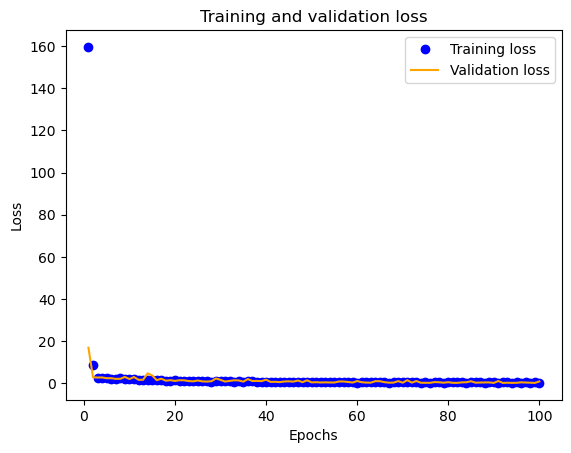

In [13]:
history_dict = fit_model.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 997us/step


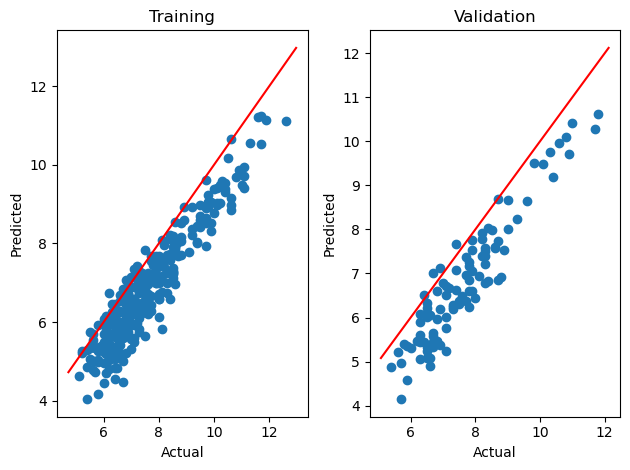

In [15]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=opt1_model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=opt1_model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [16]:
# metrics
pred = opt1_model.predict(X_test)
pred

trainpreds = opt1_model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

10/10 [==============================] - 0s 997us/step
0.7793585949256772
0.8724582307478963


## Optimization Attempt 2 (additional Hidden layer)

In [40]:
# define X (inputs) and y (target/output)
X = merged_df.drop(columns = ["Year-State","Major CV Disease-Overall"], axis=1)
y = merged_df[['Major CV Disease-Overall']]

In [41]:
X = np.array(X)
y = np.array(y)

In [42]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(305, 29) (102, 29) (305, 1) (102, 1)


In [43]:
from sklearn.preprocessing import MinMaxScaler
# Create scaler instance
min_max_scaler2 = MinMaxScaler()

X_scaler2 = min_max_scaler2.fit(X_train)

# Scale the data
X_train_scaled = X_scaler2.transform(X_train)
X_test_scaled = X_scaler2.transform(X_test)

In [44]:
# Create the Keras Sequential model
opt2_model = tf.keras.models.Sequential()

In [45]:
# Add our first Dense layer, including the input layer
opt2_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=29))

In [46]:
# Add our hidden layer layer, including the input layer
opt2_model.add(tf.keras.layers.Dense(units=5, activation="relu"))

In [47]:
# Add our hidden layer layer, including the input layer
opt2_model.add(tf.keras.layers.Dense(units=5, activation="relu"))

In [48]:
# Add the output layer that uses a probability activation function
opt2_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [49]:
# Check the structure of the Sequential model
opt2_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 150       
                                                                 
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 216 (864.00 Byte)
Trainable params: 216 (864.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Compile the Sequential model together and customize metrics
opt2_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Fit the model to the training data
fit_model2 = opt2_model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100,
                    verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 13ms/step - loss: 19.5436 - mae: 4.0480 - val_loss: 6.9188 - val_mae: 2.3954
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 4.4392 - mae: 1.7648 - val_loss: 2.4955 - val_mae: 1.2856
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.7685 - mae: 0.9958 - val_loss: 1.2450 - val_mae: 0.8308
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2107 - mae: 0.8320 - val_loss: 1.0464 - val_mae: 0.7763
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1475 - mae: 0.8371 - val_loss: 1.0835 - val_mae: 0.7707
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1050 - mae: 0.8122 - val_loss: 0.9956 - val_mae: 0.7569
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0705 - mae: 0.8128 - val_loss: 0.9806 - val_mae: 0.7396
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0379 -

10/10 [==============================] - 0s 3ms/step - loss: 0.3067 - mae: 0.4483 - val_loss: 0.3399 - val_mae: 0.4663
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3189 - mae: 0.4520 - val_loss: 0.3385 - val_mae: 0.4669
Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2970 - mae: 0.4423 - val_loss: 0.3351 - val_mae: 0.4630
Epoch 66/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3085 - mae: 0.4503 - val_loss: 0.3649 - val_mae: 0.4861
Epoch 67/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2988 - mae: 0.4374 - val_loss: 0.3555 - val_mae: 0.4823
Epoch 68/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3025 - mae: 0.4442 - val_loss: 0.3526 - val_mae: 0.4772
Epoch 69/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2908 - mae: 0.4337 - val_loss: 0.3218 - val_mae: 0.4540
Epoch 70/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2953 - mae: 0

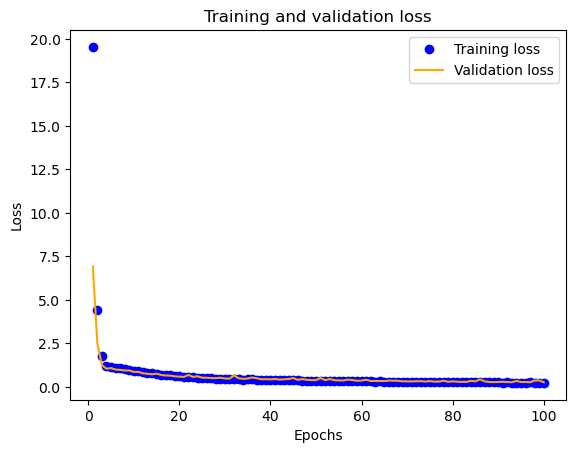

In [51]:
history_dict2 = fit_model2.history
loss_values2 = history_dict2['loss'] # you can change this
val_loss_values2 = history_dict2['val_loss'] # you can also change this
epochs2 = range(1, len(loss_values2) + 1) # range of X (no. of epochs)
plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 1ms/step


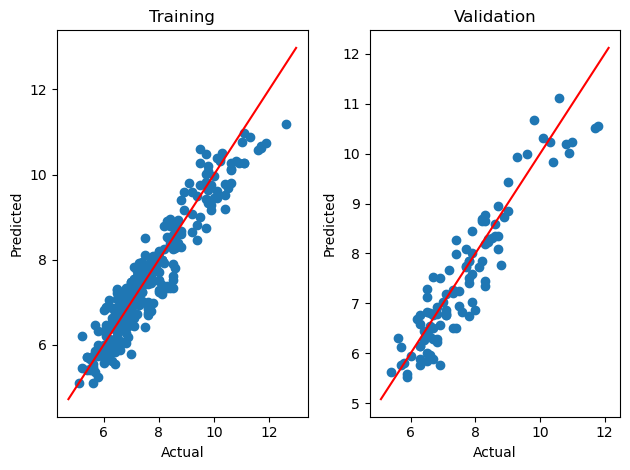

In [52]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=opt2_model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=opt2_model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [53]:
# metrics
pred = opt2_model.predict(X_test)
pred

trainpreds = opt2_model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

10/10 [==============================] - 0s 997us/step
0.38422271853587664
0.4176758214539172
